## Question 1: Given some sample data, write a program to answer the following: click [here](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0) to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

- 1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
- 2. What metric would you report for this dataset?
- 3. What is its value?


### read data

In [21]:
import pandas as pd
import numpy as np
import csv
import requests
import io
import matplotlib.pyplot as plt

In [11]:
q1_path="./data/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv"
q1_df=pd.read_csv(q1_path)
q1_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


### native calculation

In [40]:
aov = sum(q1_df['order_amount']) / len(q1_df)
print("A native calculation of aov: $", round(wrong_aov, 2))

A native calculation of aov: $ 3145.13


In [41]:
# order_id
order_id = q1_df['order_id'].unique()
if len(order_id) == len(q1_df):
    print("There's no duplicated orders")
else:
    print("There're some duplicated orders")
    
# shop_id
shop_id = q1_df['shop_id']
print("shop_id ranges from {} to {}.".format(min(shop_id), max(shop_id)))  

# order_amount
order_amount = q1_df['order_amount']
print("The minimum order_amount is {} and maximum is {}.".format(min(order_amount), max(order_amount)))  


# total_items
total_items = q1_df['total_items']
print("The minimum total_items is {} and maximum is {}.".format(min(total_items), max(total_items)))

There's no duplicated orders
shop_id ranges from 1 to 100.
The minimum order_amount is 90 and maximum is 704000.
The minimum total_items is 1 and maximum is 2000.


In [42]:
q1_df[q1_df['order_amount'] == 704000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


> This native way to calculate AOV was using the total order amount divided by the number of orders. And the answer is 3124.13. However, this amount seems too high. After checking the `order_amount` and `total_items` columns, I found that some of the values were extremely large. For an instance, there're several records showing that a customer with id 607 bought 2000 shoes in the shop(42) and spent 704000 in total. In addition, all orders were created at a same time and even some of them were created at exactly same date and same time. so it's reasonable to say these records were fake. Since we have outliers, using `average` is not a good solution.

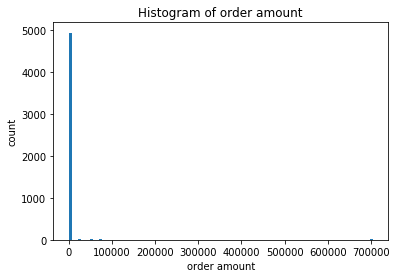

In [58]:
# order_amount distribution
n, bins, patches = plt.hist(order_amount, 100)
plt.xlabel('order amount')
plt.ylabel('count')
plt.title('Histogram of order amount')
plt.show()

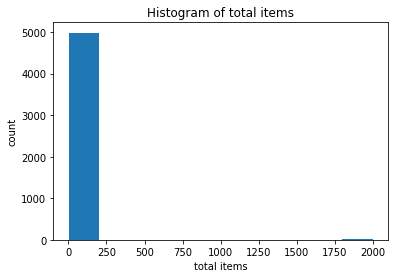

In [61]:
# total_items distribution
n, bins, patches = plt.hist(total_items, 10)
plt.xlabel('total items')
plt.ylabel('count')
plt.title('Histogram of total items')
plt.show()

### median order value vs. average order value

In [65]:
sort_order_amount = sorted(order_amount)
mov = sort_order_amount[len(sort_order_amount)//2]
print("median order value is $", mov)

median order value is $ 284


> A median can eliminate outliers on the high or low end of the order amount since it’s simply the middle value. Since we have already know that we have outliers in this data, a median order value should be better. So I calculate the MOV of 284 which is significantly different from AOV. In this scenario, you can not depend on AOV only to see a full picture. 